In [32]:
#Import Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')


import pickle


In [33]:
#loading data

data = pd.read_csv('Train_Loan_Home.csv') #import the train dataset


In [34]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


DATA EXPLORATION / PREPROCESSING Data-Preprocessing steps:

Handling missing values Creation of Dummy variables Replacing the data-values

In [35]:
data.info() #There are 3 different datatypes in the dataset which include float64(4), int64(1), object(8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [36]:
data.isnull().sum()  #print out sum of null values in each column

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

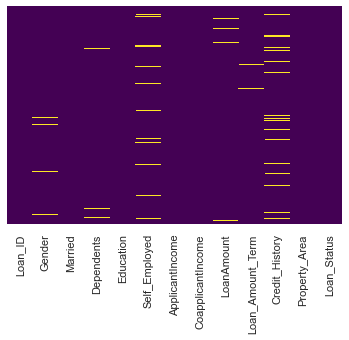

In [37]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis') #i used the seaborn heatmap to visualize null values in each column

* * * * from the visualization above we have missing values in gender,dependents,self-employed,loanAmount,loan-amount-term,credit-history

In [38]:
 data = data.fillna(data.mean().iloc[0]) #i used the fillna function to fill the missing values

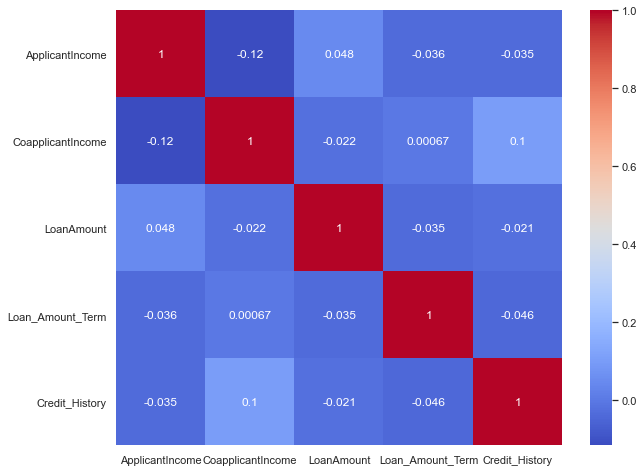

In [39]:
#Show how data is corelated with each other

plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm');

In [40]:
# print out column with unique values
for col in data.columns:
    if data[col].dtypes == 'object':
        num_of_unique_cat = len (data[col].unique())
        print("Features '{col_name}' has '{unique_cat}' unique categories". format(col_name=col, unique_cat=num_of_unique_cat))

Features 'Loan_ID' has '614' unique categories
Features 'Gender' has '3' unique categories
Features 'Married' has '3' unique categories
Features 'Dependents' has '5' unique categories
Features 'Education' has '2' unique categories
Features 'Self_Employed' has '3' unique categories
Features 'Property_Area' has '3' unique categories
Features 'Loan_Status' has '2' unique categories


In [41]:
#Feature Engineering 

#Drop irrelevant features 
#Labels are encoded to numbers
#Set target and features 

data = data.drop(['Loan_ID','Dependents',], axis = 1)

data['Self_Employed'].replace({'Yes':1,'No':0},inplace=True)
data['Married'].replace({'Yes':1,'No':0},inplace=True)
data['Gender'].replace({'Male':1,'Female':0},inplace=True)
data['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)
data['Property_Area'].replace({'Urban':2,'Semiurban':1,'Rural':0},inplace=True)
data['Loan_Status'].replace({'Y':1,'N':0},inplace=True)

y = data['Loan_Status'] #target
X = data.drop('Loan_Status', axis = 1) #prediators

In [42]:
#Spliting data into traing and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [43]:
#LogisticRegression object is created

model = LogisticRegression() 

In [44]:
#HPYPER PARAMETER TUNING

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

ypred = grid_result.predict(X_test) #predict on test sample
evaluation = grid_result.score(X_test, y_test)
print("Accuracy is",evaluation)


Accuracy is 0.7317073170731707


In [45]:
#prediction

Gender=0.0 #feature1
Married=1.0 #feature2
education=1 #feature3
Self_Employed=1 #feature4
ApplicantIncome=5000 #feature5
CoapplicantIncome=5022.0 #feature6
LoanAmount=1000.0 #feature7
Loan_Amount_Term=4260.0 #feature8
Credit_History=1.0 #feature9
Property_Area=0 #feature10

In [46]:
result=grid_result.predict_proba(np.array([[Gender,Married,education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area]]))

In [47]:
print("probability of getting loan is ",result[-1][-1])

probability of getting loan is  0.49413046219416135


In [48]:
Gender=0.0 #feature1
Married=1.0 #feature2
education=1 #feature3
Self_Employed=1 #feature4
ApplicantIncome=5000 #feature5
CoapplicantIncome=5222.0 #feature6
LoanAmount=100.0 #feature7
Loan_Amount_Term=4260.0 #feature8
Credit_History=1.0 #feature9
Property_Area=0 #feature10

In [49]:
result=grid_result.predict_proba(np.array([[Gender,Married,education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area]]))

In [50]:
print("probability of getting loan is ",result[-1][-1])

probability of getting loan is  0.5417808013600736
